In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
import glob
glob.glob("/home/papi/Desktop/DWM_Project/stops*.xlsx")
all_data = pd.DataFrame()
for f in glob.glob("/home/papi/Desktop/DWM_Project/stops*.xlsx"):
    df = pd.read_excel(f)
    all_data = all_data.append(df,ignore_index=True)
df=all_data

In [3]:
df.describe()

,Unnamed: 0,c+label,diff_of_arrival_time,stop_id,stop_sequence
count,48979.000000,48979.000000,48979.000000,48979.000000,48979.000000
mean,3498.000000,1.484269,1.649573,1718.887237,18.214949
std,2019.880516,0.998147,7.339901,1018.702233,12.950443
min,0.000000,0.000000,-15.566667,47.000000,0.000000
25%,1749.000000,1.000000,-3.333333,707.000000,7.000000
50%,3498.000000,2.000000,-0.033333,1736.000000,16.000000
75%,5247.000000,2.000000,7.016667,2629.000000,29.000000
max,6996.000000,3.000000,15.566667,4393.000000,43.000000


In [4]:
df

,Unnamed: 0,actual_arrival_time,c+label,departure_time,diff_of_arrival_time,scheduled_arrival_time,stop_id,stop_sequence,trip_id,day
0,0,18:51:45,3,18:51:45,-8.250000,19:00:00,1763,0,1_19_0,f
1,1,18:56:27,3,18:56:27,-6.233333,19:02:41,3094,1,1_19_0,f
2,2,18:55:57,3,18:55:57,-8.050000,19:04:00,2316,2,1_19_0,f
3,3,18:57:35,3,18:57:35,-8.300000,19:05:53,681,3,1_19_0,f
4,4,19:06:55,2,19:06:55,-2.033333,19:08:57,1517,4,1_19_0,f
5,5,19:03:58,3,19:03:58,-7.216667,19:11:11,2028,5,1_19_0,f
6,6,19:05:57,3,19:05:57,-8.016667,19:13:58,487,6,1_19_0,f
7,7,19:15:31,2,19:15:31,-1.200000,19:16:43,2541,7,1_19_0,f
8,8,19:12:09,3,19:12:09,-6.166667,19:18:19,2036,8,1_19_0,f
9,9,19:13:02,3,19:13:02,-8.033333,19:21:04,2945,9,1_19_0,f


In [5]:
df.day=pd.Categorical(df.day,['m','t','w','th','f','sa','su'])
df.day=df.day.cat.codes

In [6]:
df.head()

,Unnamed: 0,actual_arrival_time,c+label,departure_time,diff_of_arrival_time,scheduled_arrival_time,stop_id,stop_sequence,trip_id,day
0,0,18:51:45,3,18:51:45,-8.250000,19:00:00,1763,0,1_19_0,4
1,1,18:56:27,3,18:56:27,-6.233333,19:02:41,3094,1,1_19_0,4
2,2,18:55:57,3,18:55:57,-8.050000,19:04:00,2316,2,1_19_0,4
3,3,18:57:35,3,18:57:35,-8.300000,19:05:53,681,3,1_19_0,4
4,4,19:06:55,2,19:06:55,-2.033333,19:08:57,1517,4,1_19_0,4


In [7]:
at=[]
for (row,rowdata) in df.iterrows():
    f=rowdata["actual_arrival_time"][0:2]
    s=rowdata["actual_arrival_time"][3:5]
    f=int(f)
    s=int(s)
    s="{:.1f}".format(s/60)
    s=float(s)
    f=f+s
    at.append(f)
df["arrival_time"]=at

    

In [8]:
df

,Unnamed: 0,actual_arrival_time,c+label,departure_time,diff_of_arrival_time,scheduled_arrival_time,stop_id,stop_sequence,trip_id,day,arrival_time
0,0,18:51:45,3,18:51:45,-8.250000,19:00:00,1763,0,1_19_0,4,18.8
1,1,18:56:27,3,18:56:27,-6.233333,19:02:41,3094,1,1_19_0,4,18.9
2,2,18:55:57,3,18:55:57,-8.050000,19:04:00,2316,2,1_19_0,4,18.9
3,3,18:57:35,3,18:57:35,-8.300000,19:05:53,681,3,1_19_0,4,18.9
4,4,19:06:55,2,19:06:55,-2.033333,19:08:57,1517,4,1_19_0,4,19.1
5,5,19:03:58,3,19:03:58,-7.216667,19:11:11,2028,5,1_19_0,4,19.1
6,6,19:05:57,3,19:05:57,-8.016667,19:13:58,487,6,1_19_0,4,19.1
7,7,19:15:31,2,19:15:31,-1.200000,19:16:43,2541,7,1_19_0,4,19.2
8,8,19:12:09,3,19:12:09,-6.166667,19:18:19,2036,8,1_19_0,4,19.2
9,9,19:13:02,3,19:13:02,-8.033333,19:21:04,2945,9,1_19_0,4,19.2


In [9]:
df

,Unnamed: 0,actual_arrival_time,c+label,departure_time,diff_of_arrival_time,scheduled_arrival_time,stop_id,stop_sequence,trip_id,day,arrival_time
0,0,18:51:45,3,18:51:45,-8.250000,19:00:00,1763,0,1_19_0,4,18.8
1,1,18:56:27,3,18:56:27,-6.233333,19:02:41,3094,1,1_19_0,4,18.9
2,2,18:55:57,3,18:55:57,-8.050000,19:04:00,2316,2,1_19_0,4,18.9
3,3,18:57:35,3,18:57:35,-8.300000,19:05:53,681,3,1_19_0,4,18.9
4,4,19:06:55,2,19:06:55,-2.033333,19:08:57,1517,4,1_19_0,4,19.1
5,5,19:03:58,3,19:03:58,-7.216667,19:11:11,2028,5,1_19_0,4,19.1
6,6,19:05:57,3,19:05:57,-8.016667,19:13:58,487,6,1_19_0,4,19.1
7,7,19:15:31,2,19:15:31,-1.200000,19:16:43,2541,7,1_19_0,4,19.2
8,8,19:12:09,3,19:12:09,-6.166667,19:18:19,2036,8,1_19_0,4,19.2
9,9,19:13:02,3,19:13:02,-8.033333,19:21:04,2945,9,1_19_0,4,19.2


In [10]:
x=df.loc[:, ['day','arrival_time']].values
y=df.iloc[:,2].values

In [11]:
y

array([3, 3, 3, ..., 1, 1, 1])

In [12]:
x

array([[ 4. , 18.8],
       [ 4. , 18.9],
       [ 4. , 18.9],
       ...,
       [ 6. , 13.6],
       [ 6. , 13.6],
       [ 6. , 13.7]])

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [14]:
x1=input("enter day number of week ")
y1=input("enter time ")
f=y1[0:2]
s=y1[3:5]
f=int(f)
s=int(s)
s="{:.1f}".format(s/60)
s=float(s)
f=f+s
y1=f
z=np.array([[x1,y1]])
z=z.astype(np.float64)
op=classifier.predict(z)
if(op==0):
    print("bus can be upto 5 min late")
if(op==1):
    print("bus can be more than 5 min late")
if(op==2):
    print("bus can be upto 5 min early")
if(op==3):
    print("bus can be more than 5 min early")
        
    

enter day number of week 1
enter time 19:00:00
bus can be upto 5 min early


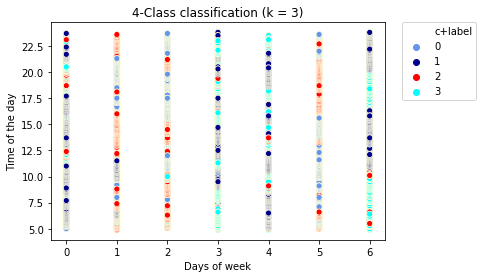

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
n_neighbors=3

#plt.scatter(x[:, 0], df.iloc[:,1], c=y,hue=df['c+label'])
#cmap_light = ListedColormap(['cyan','yellow','pink','green'])
cmap_bold = ['cornflowerblue','darkblue','red','cyan']

sns.scatterplot(x[:, 0], x[:, 1], hue=df['c+label'],
                    palette=cmap_bold, alpha=1.0, edgecolor="lightyellow")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title("4-Class classification (k = %i)"
              % (n_neighbors))
plt.xlabel('Days of week')
plt.ylabel('Time of the day')

    

plt.show()
